# Class 13

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv("/kaggle/input/customer-churn-prediction-datasets/Customer-Churn-Prediction.csv")

In [3]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
1869/(5174+1869)

0.2653698707936959

<Axes: xlabel='Churn', ylabel='count'>

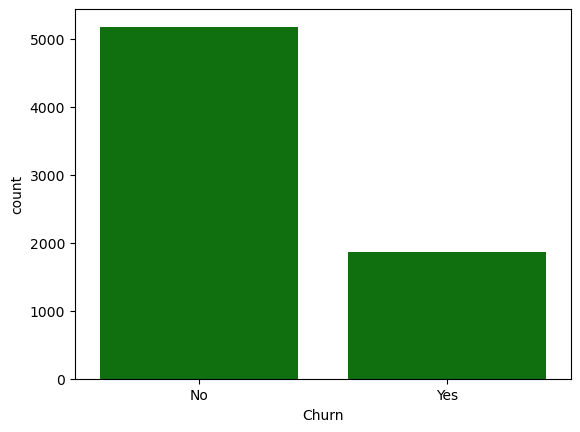

In [9]:
sns.countplot(x=df['Churn'],color='green')

In [10]:
df = df.dropna()

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(7043, 21)

In [13]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.01609,0.219856
tenure,0.016090,1.00000,0.247890
MonthlyCharges,0.219856,0.24789,1.000000


/tmp/ipykernel_20/1515604522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

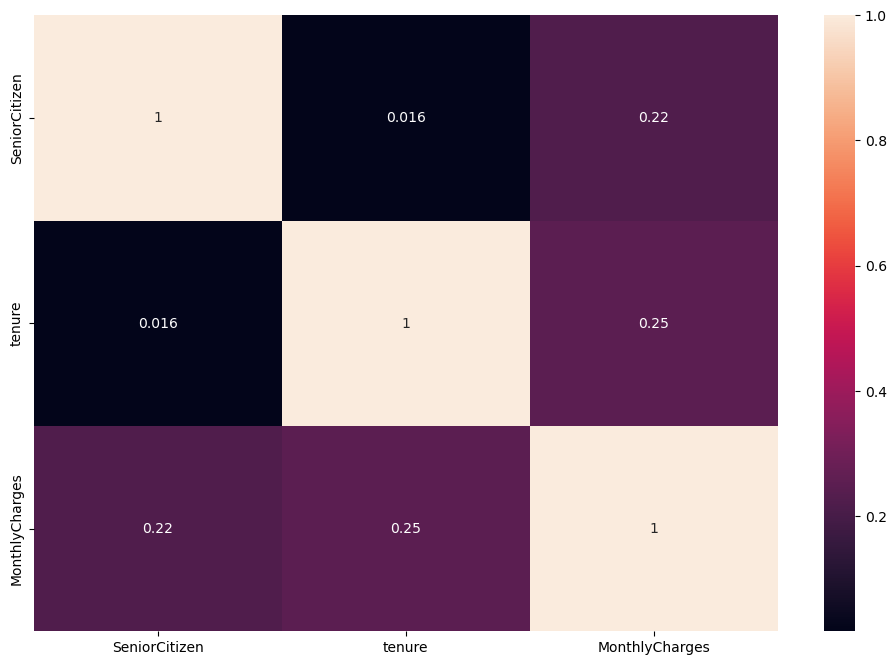

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

## Data Visualization

<Axes: xlabel='count', ylabel='gender'>

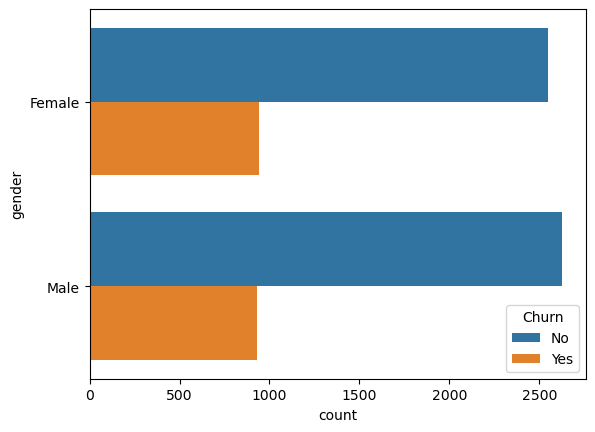

In [15]:
sns.countplot(y = 'gender', hue= 'Churn', data=df)

<Axes: xlabel='gender', ylabel='count'>

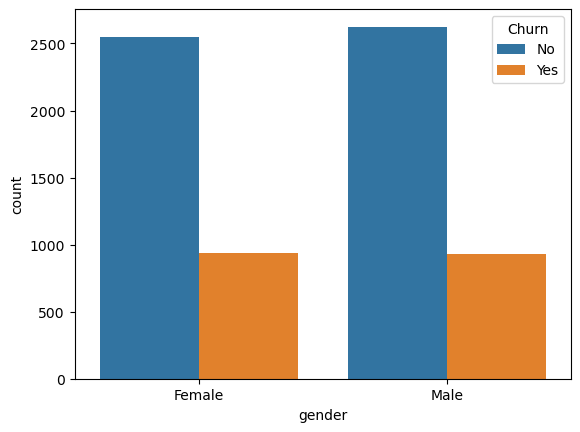

In [16]:
sns.countplot(x = 'gender', hue= 'Churn', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

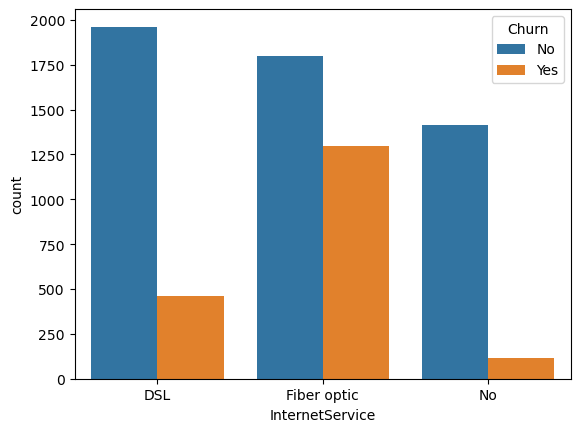

In [17]:
sns.countplot(x = 'InternetService', hue= 'Churn', data=df)

<Axes: xlabel='PhoneService', ylabel='count'>

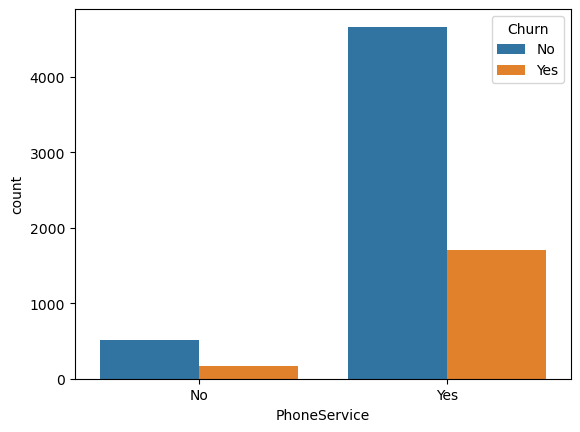

In [18]:
sns.countplot(x = 'PhoneService', hue= 'Churn', data=df)

<Axes: xlabel='OnlineSecurity', ylabel='count'>

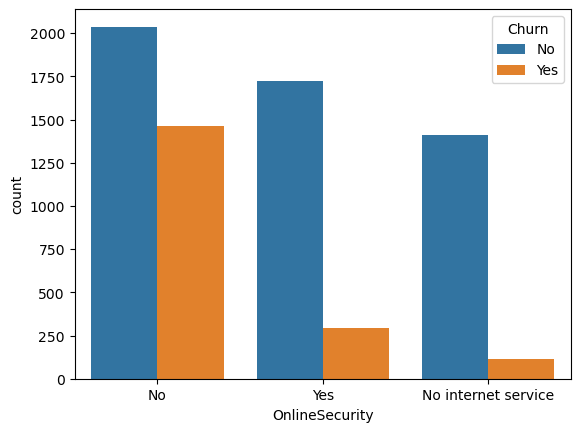

In [19]:
sns.countplot(x = 'OnlineSecurity', hue= 'Churn', data=df)

In [20]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<Axes: xlabel='PaymentMethod', ylabel='count'>

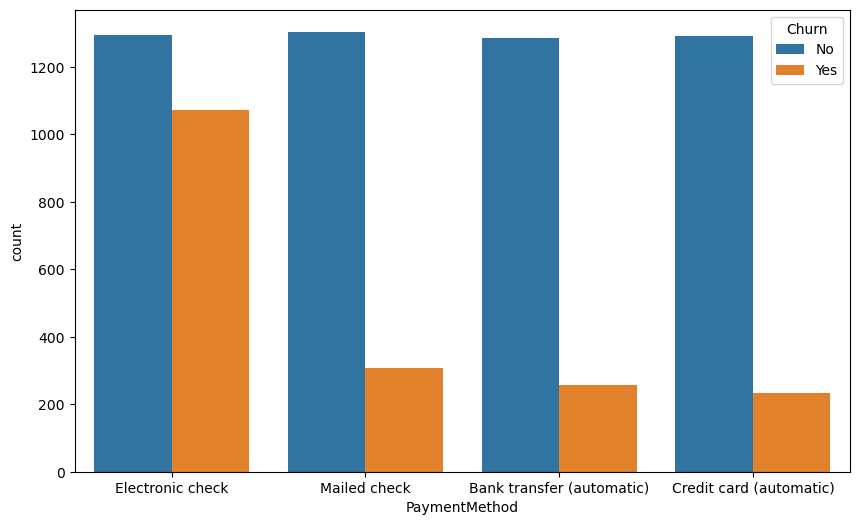

In [21]:
plt.subplots(figsize=(10,6))
sns.countplot(x = 'PaymentMethod', hue= 'Churn', data=df)

<Axes: xlabel='count', ylabel='PaymentMethod'>

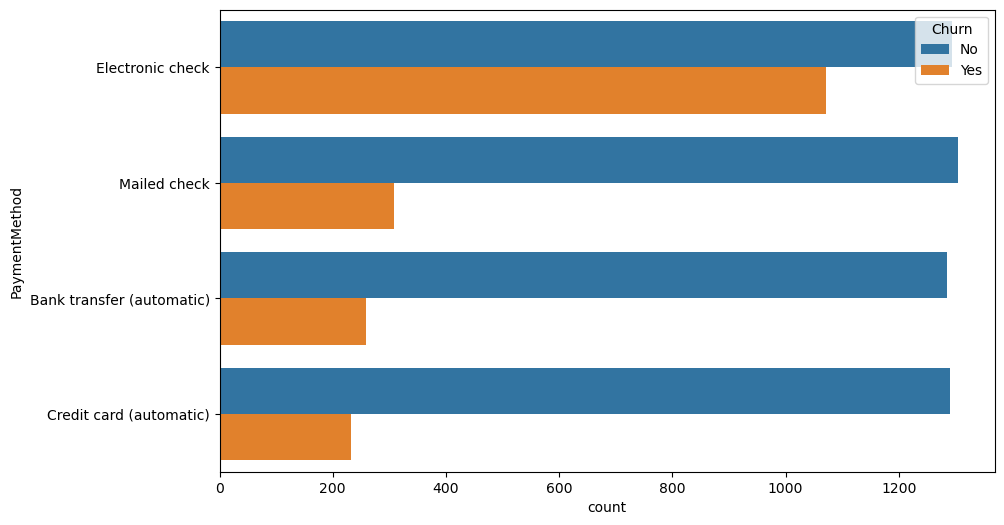

In [22]:
plt.subplots(figsize=(10,6))
sns.countplot(y = 'PaymentMethod', hue= 'Churn', data=df)

## Preprocessing

In [23]:
df = df.drop('customerID',axis=1)

In [24]:
df.shape

(7043, 20)

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label = LabelEncoder()

In [28]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
from pandas.core.dtypes.common import is_numeric_dtype

In [30]:
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = label.fit_transform(df[column])

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


## Define x and y

In [32]:
x = df.drop('Churn', axis=1)
y = df['Churn']

In [33]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [34]:
x.shape

(7043, 19)

In [35]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [36]:
y.shape

(7043,)

## Imbalance Data Handling

In [37]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [38]:
not_churned = (5174/(5174+1869)) * 100
churned = (1869/(5174+1869)) * 100

In [39]:
print("Not churned {} percent of total people".format(not_churned))
print("Churned {} percent of total people".format(churned))

Not churned 73.4630129206304 percent of total people
Churned 26.536987079369588 percent of total people


## Synthetic Minority Oversampling Technique (SMOTETomek)

In [40]:
from imblearn.combine import SMOTETomek

In [41]:
sm = SMOTETomek(random_state=42)

In [42]:
y.value_counts() #before sampling

0    5174
1    1869
Name: Churn, dtype: int64

In [43]:
X,Y = sm.fit_resample(x,y)

In [44]:
X.shape

(9610, 19)

In [45]:
Y.shape

(9610,)

In [46]:
Y.value_counts() # after sampling

0    4805
1    4805
Name: Churn, dtype: int64

## Near Miss for Under_sampling

In [47]:
from imblearn.under_sampling import NearMiss

In [48]:
NearMiss_obj = NearMiss()
new_x, new_y = NearMiss_obj.fit_resample(x,y)

In [49]:
new_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.90,1624
1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.90,5454
2,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
3,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
4,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.20,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,12,1,0,0,0,0,0,2,2,0,1,1,2,59.80,5651
3734,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,3448
3735,1,1,0,0,1,1,2,1,0,0,0,0,0,0,0,1,2,75.75,5776
3736,0,0,0,0,67,1,2,1,2,2,2,0,2,0,0,1,1,102.95,5431


In [50]:
new_x.shape

(3738, 19)

In [51]:
3738/2

1869.0

In [52]:
new_y

0       0
1       0
2       0
3       0
4       0
       ..
3733    1
3734    1
3735    1
3736    1
3737    1
Name: Churn, Length: 3738, dtype: int64

In [53]:
new_y.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

## Oversampling

In [54]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df2.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
over = RandomOverSampler(random_state=100)

In [58]:
x_new, y_new = over.fit_resample(x,y)

In [59]:
x_new.shape

(10348, 19)

In [60]:
y_new.shape

(10348,)

In [61]:
y_new .value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Cross Validation

### Hold Out Cross Validation

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y_new,train_size=75,random_state=42)

In [64]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7869,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.25,2038
1016,1,0,1,0,71,1,2,0,2,2,2,2,0,2,2,1,3,80.10,4623
9467,0,1,1,0,66,1,2,0,0,2,2,0,2,2,2,1,0,80.55,4405
7629,1,0,0,0,36,1,2,1,0,0,0,0,0,2,0,1,2,84.75,2653
995,0,0,0,0,35,1,2,1,0,2,0,2,0,0,0,0,1,85.30,2520


In [65]:
train, test = train_test_split(df,train_size=80,random_state=42)

In [66]:
train.to_csv('total 80.csv')

In [67]:
df6 = pd.read_csv('total 80.csv')

In [68]:
df6.shape

(80, 21)

In [69]:
df6.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3461,0,0,1,1,55,1,0,0,2,...,0,0,0,0,0,0,2,55.70,2724,0
1,1021,1,0,1,0,28,1,0,0,2,...,0,2,0,0,1,0,3,54.35,790,0
2,3073,0,0,0,0,52,0,1,0,2,...,2,0,2,2,2,1,0,58.75,2640,0
3,3943,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,2,44.00,3734,0
4,1585,1,0,1,0,42,1,2,0,2,...,0,2,2,2,1,0,1,80.45,2930,0


In [70]:
train1, teat1 = train_test_split(df,train_size=75,random_state=42)

In [71]:
train1.to_csv('train_data.csv')

In [72]:
xtest.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
9428,0,0,0,0,54,1,2,1,0,0,0,2,2,2,0,1,2,100.10,4523
4593,0,0,0,0,11,1,0,2,1,1,1,1,1,1,0,0,0,20.30,2108
5379,0,0,1,0,56,1,2,1,2,0,0,0,2,2,1,1,2,98.00,4412
8918,0,1,0,0,2,1,0,1,0,0,0,0,0,2,0,1,2,79.60,1551
6448,1,0,0,0,58,1,2,1,0,0,2,2,2,2,1,1,2,104.65,5051


In [73]:
xtest.shape

(10273, 19)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
Clf = DecisionTreeClassifier()

In [76]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [77]:
Clf.score(xtest,ytest)

0.6726370096369123

## Without Sampling

In [78]:
x.shape

(7043, 19)

In [79]:
xtrain1, xtest1,ytrain1,ytest1 = train_test_split(x,y,train_size=75,random_state=42)

In [80]:
Clf.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [81]:
Clf.score(xtest,ytest)

0.6029397449625231

## Xgboost

In [82]:
import xgboost
from xgboost import XGBClassifier

In [83]:
xgb = XGBClassifier()

In [84]:
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [85]:
xgb.score(xtest,ytest)

0.7181933223011778

In [86]:
## Before sampling
xgb.fit(xtrain1,ytrain1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
xgb.score(xtest1,ytest1)

0.7590413318025259

## ADA Boost

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
ada = AdaBoostClassifier()

In [90]:
##Before Sampling
ada.fit(xtrain1,ytrain1)

AdaBoostClassifier()

In [91]:
ada.score(xtest1,ytest1)

0.7659299655568312

In [92]:
##After Sampling
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [93]:
ada.score(xtest,ytest)

0.6831500048671274

## K Fold Cross Validation

In [94]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [95]:
kfold = KFold(n_splits=4) #each fold contains 25% data

In [96]:
result = cross_val_score(xgb, x_new, y_new, cv=kfold)

In [97]:
result

array([0.79628914, 0.77966757, 0.86084267, 0.87398531])

In [98]:
result.mean()

0.8276961731735601

In [99]:
result.max()

0.8739853111712408

## Stratified K Fold Cross Validation

In [100]:
from sklearn.model_selection import StratifiedKFold

In [101]:
st = StratifiedKFold(n_splits=4)

In [102]:
score2 = cross_val_score(xgb,x_new,y_new,cv=st)

In [103]:
score2

array([0.84808659, 0.8562041 , 0.85890993, 0.8867414 ])

In [104]:
score2.max()

0.8867413993042134

In [105]:
score2.min()

0.8480865867800541

In [106]:
score2.mean()

0.8624855044453035

## Leave One Out Cross Validation

In [107]:
from sklearn.model_selection import LeaveOneOut

In [108]:
le = LeaveOneOut()

In [109]:
#result3 = cross_val_score(xgb,x_new,y_new,cv=le)

In [110]:
#result3

In [111]:
#result3.mean()